In [1]:
import folium

In [3]:
gps = [35.1788858,129.0737945]
zoom = 13
map = folium.Map(location=gps)
map

In [5]:
map = folium.Map(location=gps, zoom_start = zoom)
map

# 전국도시공원표준데이터

In [6]:
import pandas as  pd 
import numpy as np
import folium
import re 
from plotnine import *

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
park = pd.read_csv('data/전국도시공원표준데이터.csv',encoding ='euc-kr')
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 20 columns):
관리번호            18870 non-null object
공원명             18870 non-null object
공원구분            18870 non-null object
소재지도로명주소        8742 non-null object
소재지지번주소         17751 non-null object
위도              18870 non-null float64
경도              18870 non-null float64
공원면적            18870 non-null float64
공원보유시설(운동시설)    5005 non-null object
공원보유시설(유희시설)    7345 non-null object
공원보유시설(편익시설)    5508 non-null object
공원보유시설(교양시설)    1240 non-null object
공원보유시설(기타시설)    3218 non-null object
지정고시일           15913 non-null object
관리기관명           18116 non-null object
전화번호            17680 non-null object
데이터기준일자         18870 non-null object
제공기관코드          18870 non-null object
제공기관명           18870 non-null object
Unnamed: 19     0 non-null float64
dtypes: float64(4), object(16)
memory usage: 2.9+ MB


In [10]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736,1511.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
3,42790-00008,화천 어린이공원8,어린이공원,강원도 화천군 산수화로8,강원도 화천군 화천읍 아리 244-10번지 일원,38.106931,127.706165,752.0,NaN,NaN,NaN,NaN,NaN,2010-08-27,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
4,42790-00008,사내 어린이공원,어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321,1385.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1998-12-14,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN


In [11]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10128
소재지지번주소          1119
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13865
공원보유시설(유희시설)    11525
공원보유시설(편익시설)    13362
공원보유시설(교양시설)    17630
공원보유시설(기타시설)    15652
지정고시일            2957
관리기관명             754
전화번호             1190
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18870
dtype: int64

In [14]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font',family='NanumGothic')
plt.rc('axes',unicode_minus = False)

set_matplotlib_formats('retina')

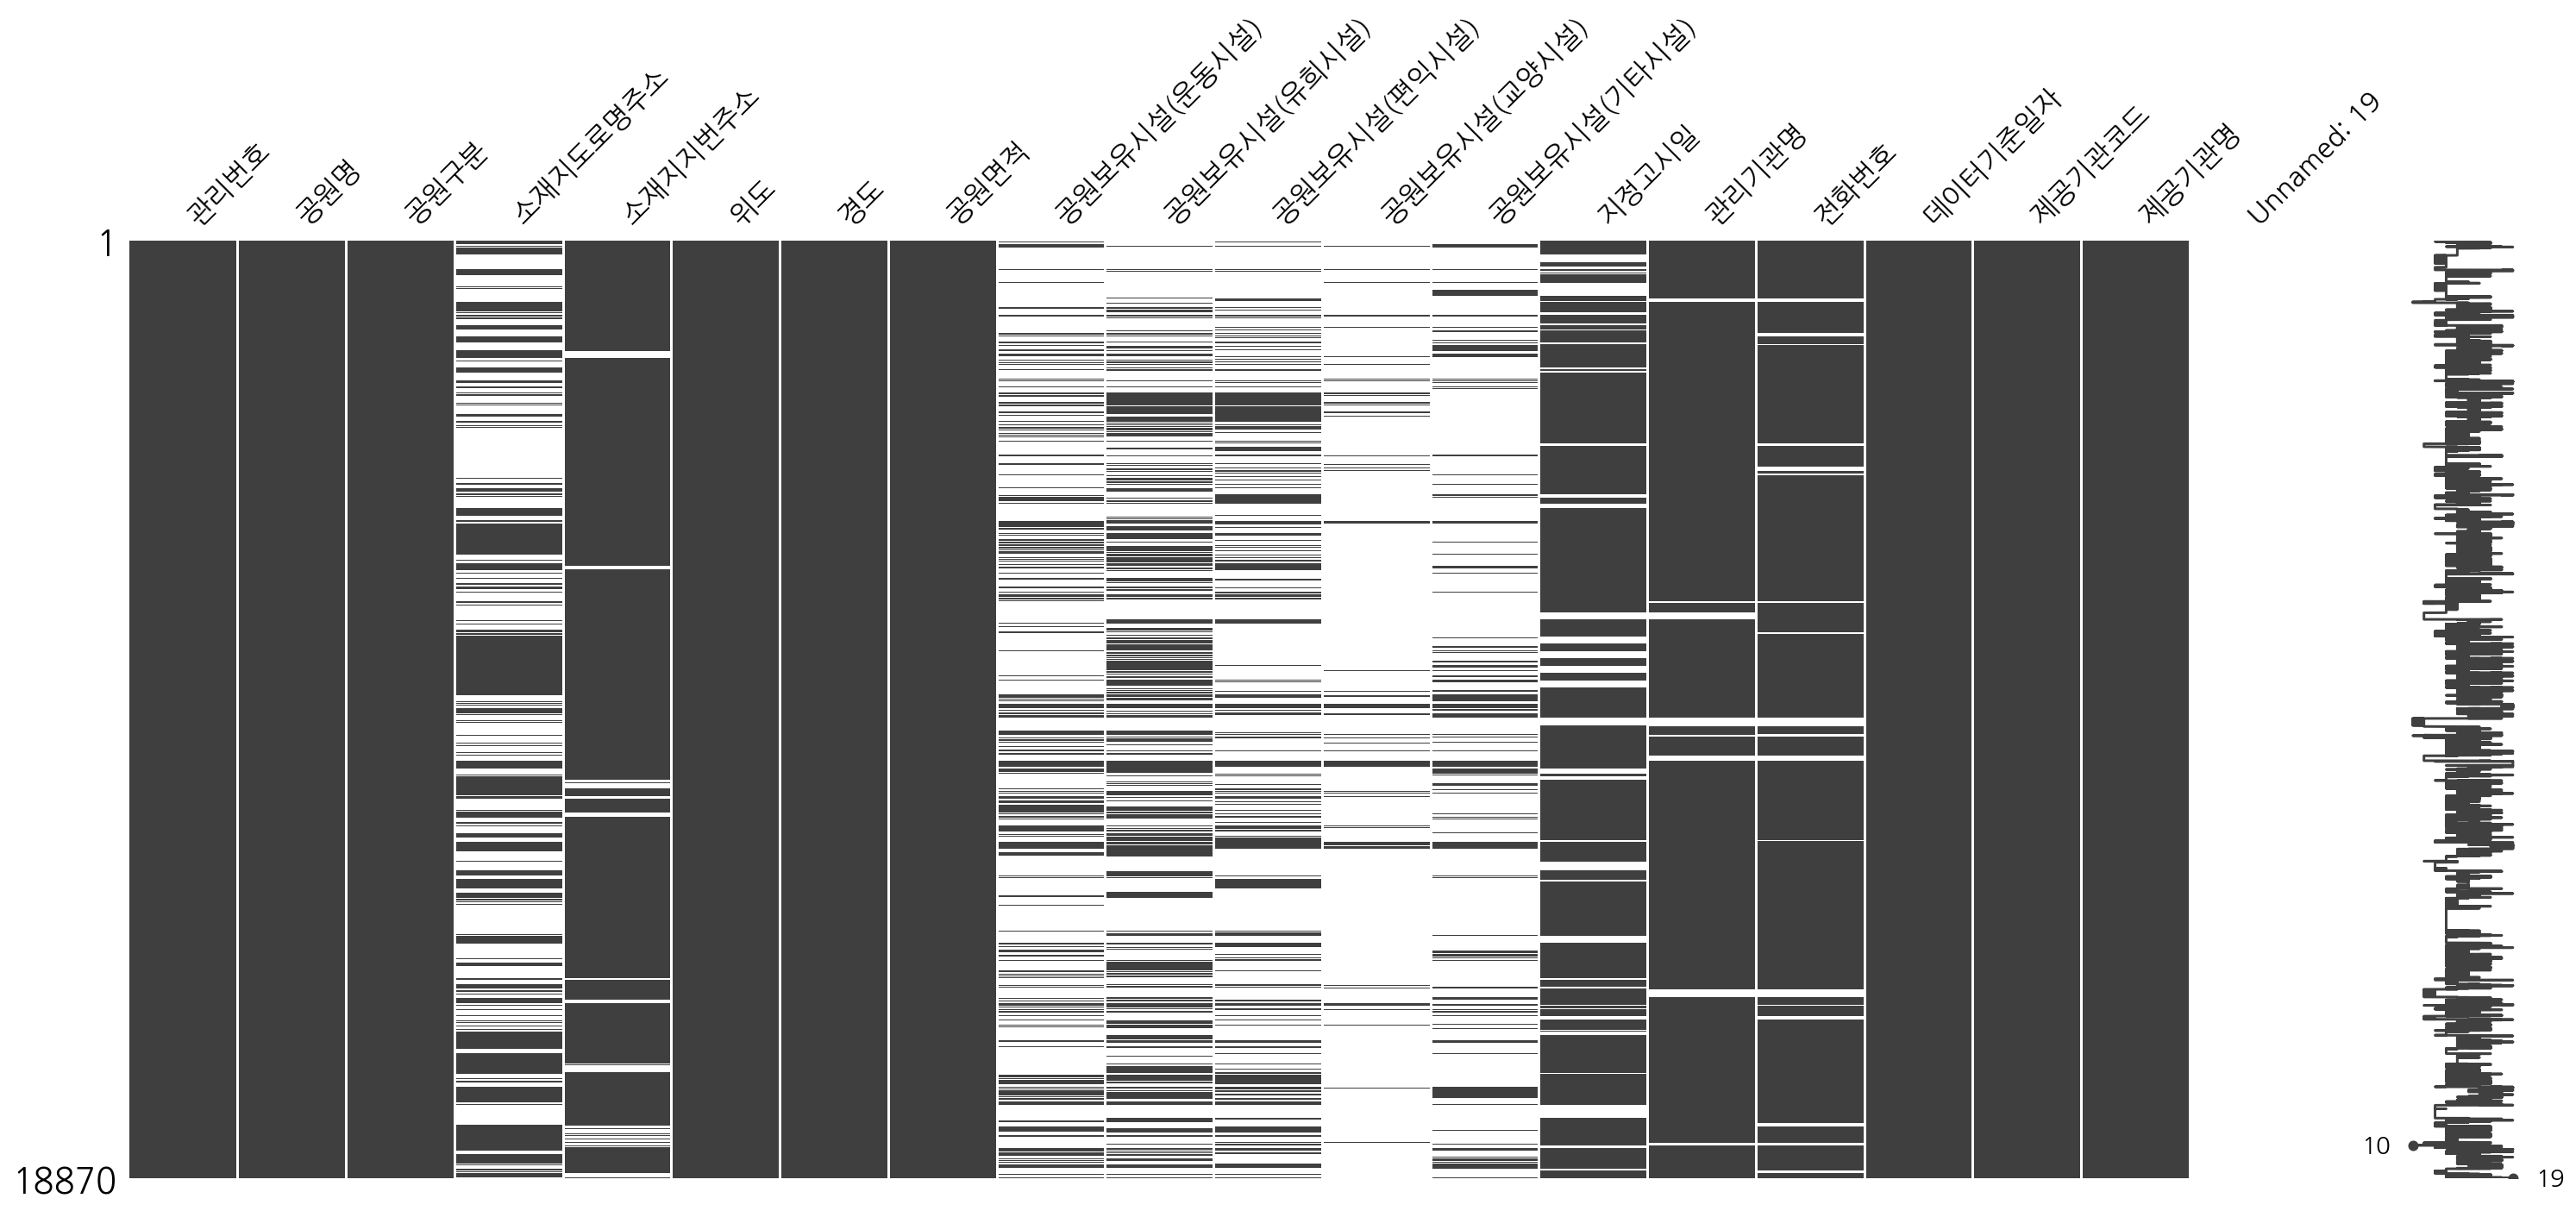

In [15]:
import missingno as msno
msno.matrix(park)

In [18]:
park.drop(columns = ['공원보유시설(운동시설)','공원보유시설(유희시설)','공원보유시설(편익시설)','공원보유시설(교양시설)','공원보유시설(기타시설)','지정고시일','관리기관명','Unnamed: 19'],inplace= True)

In [19]:
park.shape

(18870, 12)

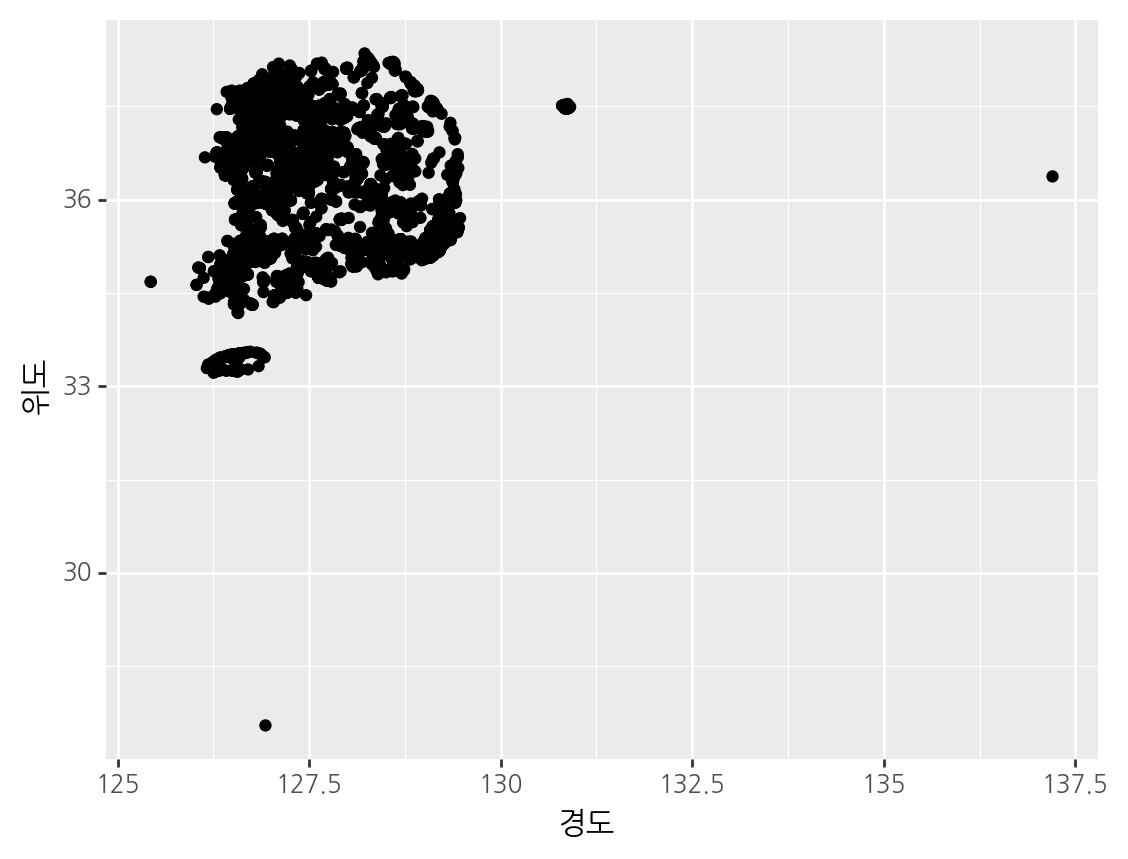

<ggplot: (8783182067013)>

In [20]:
(ggplot(park)
+ aes(x='경도',y='위도')
+ geom_point()
+ theme(text=element_text(family='NanumGothic'))
)

In [21]:
park.dtypes


관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

In [25]:
park['공원면적비율'] = park['공원면적'].apply(lambda x : np.sqrt(x)*0.01)
park['공원면적비율']

0        0.323728
1        0.419524
2        0.388716
3        0.274226
4        0.372156
           ...   
18865    0.203199
18866    2.367383
18867    3.305480
18868    2.591505
18869    6.164414
Name: 공원면적비율, Length: 18870, dtype: float64

In [26]:
park['소재지도로명주소'].isnull().sum()

10128

In [27]:
park['소재지지번주소'].isnull().sum()

1119

In [29]:
park['시도'] = park['소재지도로명주소'].str.split(' ',expand=True)[0]
park_loc_notnull = park.loc[(park['위도'] > 32) & (park['경도'] < 132) & park['시도'].notnull()]
park_loc_notnull.shape

(8742, 14)

In [30]:
gg = park.loc[park['시도'] == '경기도']
gg.shape

(1702, 14)

In [35]:
geo_df = gg
map = folium.Map(location = [geo_df['위도'].mean(), 
                             geo_df['경도'].mean()], zoom_start = 13)

for n in geo_df.index : 
    park_name = geo_df.loc[n,'공원명'] + '-' + geo_df.loc[n,'소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location = [geo_df.loc[n,'위도'] , geo_df.loc[n,'경도']],
        radius = geo_df['공원면적비율'][n],
        popup=park_name,  ##마우스를 가져다 대면 나옴 
        color = icon_color,
        fill= True,
        fill_color= icon_color
           
    ).add_to(map)
map.save("./g.html")

In [37]:
geo_df2 = park.loc[park['시도'] == '부산광역시']
map = folium.Map(location = [geo_df2['위도'].mean(), 
                             geo_df2['경도'].mean()], zoom_start = 13)

for n in geo_df2.index : 
    park_name = geo_df2.loc[n,'공원명'] + '-' + geo_df2.loc[n,'소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location = [geo_df2.loc[n,'위도'] , geo_df2.loc[n,'경도']],
        radius = geo_df2['공원면적비율'][n],
        popup=park_name,  ##마우스를 가져다 대면 나옴 
        color = icon_color,
        fill= True,
        fill_color= icon_color
           
    ).add_to(map)
map.save("./g2.html")

In [39]:
##############################################################

In [73]:
ori_df = pd.read_csv('data/2016.csv',encoding ='euc-kr')
ori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 4 columns):
구분      310 non-null object
죄종      310 non-null object
발생검거    310 non-null object
건수      310 non-null float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [74]:
tmp_df = pd.pivot_table(ori_df, columns=['죄종'],index=['구분'],values=['건수'])
tmp_df.head(5)

건수                           
죄종     강간    강도   살인      절도      폭력
구분                                  
강남  304.0  25.0  3.0  1783.5  2216.0
강동  156.0  13.5  4.5  1328.0  2365.5
강북  188.0   4.5  6.5   947.0  2630.0
강서  257.0  10.0  9.5  1511.0  2986.0
관악  293.0  11.0  6.5  1520.0  2971.0

In [75]:
## 발생한 건 수 
df1 = ori_df[ori_df['발생검거'] =='발생']
tmp_df1 = pd.pivot_table(df1, columns=['죄종'],index=['구분'],values=['건수'])
newCol = {
    "강간" : "강간 발생",
    "강도" : "강도 발생",
    "살인" : "살인 발생",
    "절도" : "절도 발생",
    "폭력" : "폭력 발생",
}
tmp_df1.rename(columns=newCol, inplace = True)
tmp_df1

건수                            
죄종   강간 발생 강도 발생 살인 발생   절도 발생   폭력 발생
구분                                    
강남   339.0  24.0   3.0  2438.0  2336.0
강동   160.0  14.0   4.0  1754.0  2530.0
강북   217.0   5.0   7.0  1222.0  2778.0
강서   275.0  10.0   9.0  1952.0  3204.0
관악   322.0  12.0   6.0  2103.0  3235.0
광진   279.0  11.0   4.0  2636.0  2392.0
구로   273.0  10.0   9.0  1910.0  3164.0
금천   175.0   7.0   6.0  1264.0  2193.0
남대문   57.0   5.0   1.0   946.0   890.0
노원   159.0   6.0   5.0  1857.0  2516.0
도봉   123.0   5.0   3.0   866.0  1441.0
동대문  190.0  10.0   5.0  1940.0  2642.0
동작   325.0   7.0   8.0  1226.0  1661.0
마포   399.0   4.0   4.0  2527.0  2939.0
방배    78.0   4.0   1.0   472.0   500.0
서대문  175.0   5.0   6.0  1503.0  1976.0
서부    54.0   4.0   4.0   781.0  1128.0
서초   350.0   9.0   4.0  1733.0  1838.0
성동   104.0   3.0   4.0  1296.0  1619.0
성북   103.0   3.0   2.0   790.0  1176.0
송파   234.0  15.0   9.0  2543.0  3289.0
수서   177.0  15.0   2.0  1149.0  1666.0
양천   131.0   7.0   5.0  1719.0  2250.0
영등포  356.0  19.0  13.0  2341.0  3593.0
용산   251.0   9.0   4.0  1489.0  2384.0
은평   102.0   5.0   2.0   885.0  1536.0
종로   137.0   6.0   4.0   952.0  1291.0
종암    51.0   5.0   2.0   680.0   932.0
중랑   164.0  14.0   8.0  1691.0  3164.0
중부   141.0   3.0   2.0  1204.0  1335.0
혜화   101.0   6.0   2.0   988.0   972.0

In [76]:
## 검거한 건 수 
df2 = ori_df[ori_df['발생검거'] =='검거']
tmp_df2 = pd.pivot_table(df2, columns=['죄종'],index=['구분'],values=['건수'])
newCol = {
    "강간" : "강간 검거",
    "강도" : "강도 검거",
    "살인" : "살인 검거",
    "절도" : "절도 검거",
    "폭력" : "폭력 검거",
}
tmp_df2.rename(columns=newCol, inplace = True)
tmp_df2

건수                            
죄종   강간 검거 강도 검거 살인 검거   절도 검거   폭력 검거
구분                                    
강남   269.0  26.0   3.0  1129.0  2096.0
강동   152.0  13.0   5.0   902.0  2201.0
강북   159.0   4.0   6.0   672.0  2482.0
강서   239.0  10.0  10.0  1070.0  2768.0
관악   264.0  10.0   7.0   937.0  2707.0
광진   234.0   6.0   4.0  1057.0  2011.0
구로   181.0  13.0   9.0   861.0  2680.0
금천   143.0   7.0   6.0   654.0  1946.0
남대문   52.0   4.0   1.0   429.0   832.0
노원   142.0   9.0   6.0   740.0  2124.0
도봉   121.0   5.0   3.0   492.0  1309.0
동대문  158.0  12.0   5.0  1071.0  2377.0
동작   149.0   7.0   6.0   554.0  1444.0
마포   320.0   7.0   4.0   940.0  2500.0
방배    51.0   5.0   1.0   293.0   446.0
서대문  147.0   4.0   7.0   752.0  1644.0
서부    49.0   2.0   4.0   389.0   980.0
서초   220.0   5.0   4.0   814.0  1583.0
성동    78.0   5.0   5.0   896.0  1408.0
성북    75.0   3.0   2.0   381.0  1004.0
송파   184.0  12.0   8.0  1048.0  2808.0
수서   144.0  16.0   2.0   789.0  1431.0
양천   108.0   7.0   5.0   755.0  1918.0
영등포  225.0  14.0  13.0   940.0  3007.0
용산   214.0  10.0   4.0   599.0  2008.0
은평    93.0   5.0   2.0   501.0  1328.0
종로   113.0   3.0   0.0   389.0  1135.0
종암    42.0   5.0   1.0   344.0   815.0
중랑   150.0  14.0   7.0  1052.0  2712.0
중부    96.0   3.0   2.0   485.0  1164.0
혜화    64.0   6.0   2.0   379.0   842.0

In [77]:
tmp = pd.concat( [tmp_df1,tmp_df2], axis=1)
tmp = tmp.astype(np.int32)
tmp

건수                                                      
죄종  강간 발생 강도 발생 살인 발생 절도 발생 폭력 발생 강간 검거 강도 검거 살인 검거 절도 검거 폭력 검거
구분                                                             
강남    339    24     3  2438  2336   269    26     3  1129  2096
강동    160    14     4  1754  2530   152    13     5   902  2201
강북    217     5     7  1222  2778   159     4     6   672  2482
강서    275    10     9  1952  3204   239    10    10  1070  2768
관악    322    12     6  2103  3235   264    10     7   937  2707
광진    279    11     4  2636  2392   234     6     4  1057  2011
구로    273    10     9  1910  3164   181    13     9   861  2680
금천    175     7     6  1264  2193   143     7     6   654  1946
남대문    57     5     1   946   890    52     4     1   429   832
노원    159     6     5  1857  2516   142     9     6   740  2124
도봉    123     5     3   866  1441   121     5     3   492  1309
동대문   190    10     5  1940  2642   158    12     5  1071  2377
동작    325     7     8  1226  1661   149     7     6   554  1444
마포    399     4     4  2527  2939   320     7     4   940  2500
방배     78     4     1   472   500    51     5     1   293   446
서대문   175     5     6  1503  1976   147     4     7   752  1644
서부     54     4     4   781  1128    49     2     4   389   980
서초    350     9     4  1733  1838   220     5     4   814  1583
성동    104     3     4  1296  1619    78     5     5   896  1408
성북    103     3     2   790  1176    75     3     2   381  1004
송파    234    15     9  2543  3289   184    12     8  1048  2808
수서    177    15     2  1149  1666   144    16     2   789  1431
양천    131     7     5  1719  2250   108     7     5   755  1918
영등포   356    19    13  2341  3593   225    14    13   940  3007
용산    251     9     4  1489  2384   214    10     4   599  2008
은평    102     5     2   885  1536    93     5     2   501  1328
종로    137     6     4   952  1291   113     3     0   389  1135
종암     51     5     2   680   932    42     5     1   344   815
중랑    164    14     8  1691  3164   150    14     7  1052  2712
중부    141     3     2  1204  1335    96     3     2   485  1164
혜화    101     6     2   988   972    64     6     2   379   842

In [78]:
tmp.to_csv('./data/2016_start.csv', sep=',',encoding = 'euc-kr')

In [79]:
crime_per_police = pd.read_csv('./data/2016_start.csv',encoding = 'euc-kr',header =1)
crime_per_police

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
0,구분,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
2,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0
3,강북,217.0,5.0,7.0,1222.0,2778.0,159.0,4.0,6.0,672.0,2482.0
4,강서,275.0,10.0,9.0,1952.0,3204.0,239.0,10.0,10.0,1070.0,2768.0
5,관악,322.0,12.0,6.0,2103.0,3235.0,264.0,10.0,7.0,937.0,2707.0
6,광진,279.0,11.0,4.0,2636.0,2392.0,234.0,6.0,4.0,1057.0,2011.0
7,구로,273.0,10.0,9.0,1910.0,3164.0,181.0,13.0,9.0,861.0,2680.0
8,금천,175.0,7.0,6.0,1264.0,2193.0,143.0,7.0,6.0,654.0,1946.0
9,남대문,57.0,5.0,1.0,946.0,890.0,52.0,4.0,1.0,429.0,832.0


In [80]:
crime_per_police.drop([0],inplace=True)
crime_per_police.head(2)

crime_per_police.set_index('죄종', inplace =True)
crime_per_police

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0
강북,217.0,5.0,7.0,1222.0,2778.0,159.0,4.0,6.0,672.0,2482.0
강서,275.0,10.0,9.0,1952.0,3204.0,239.0,10.0,10.0,1070.0,2768.0
관악,322.0,12.0,6.0,2103.0,3235.0,264.0,10.0,7.0,937.0,2707.0
광진,279.0,11.0,4.0,2636.0,2392.0,234.0,6.0,4.0,1057.0,2011.0
구로,273.0,10.0,9.0,1910.0,3164.0,181.0,13.0,9.0,861.0,2680.0
금천,175.0,7.0,6.0,1264.0,2193.0,143.0,7.0,6.0,654.0,1946.0
남대문,57.0,5.0,1.0,946.0,890.0,52.0,4.0,1.0,429.0,832.0


In [83]:
crime_per_police = crime_per_police.astype(np.int32)
crime_per_police

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339,24,3,2438,2336,269,26,3,1129,2096
강동,160,14,4,1754,2530,152,13,5,902,2201
강북,217,5,7,1222,2778,159,4,6,672,2482
강서,275,10,9,1952,3204,239,10,10,1070,2768
관악,322,12,6,2103,3235,264,10,7,937,2707
광진,279,11,4,2636,2392,234,6,4,1057,2011
구로,273,10,9,1910,3164,181,13,9,861,2680
금천,175,7,6,1264,2193,143,7,6,654,1946
남대문,57,5,1,946,890,52,4,1,429,832


In [84]:
crime_per_police.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='죄종')

In [89]:
import requests 
KAKAO_API_KEY = '1a73988f40ef978afa0aedd21a889230'
def netGetGeocoder(query) :
    url = '''
    https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
    '''.format(query)
    headers = {
        'Authorization' : 'KakaoAK {0}'.format(KAKAO_API_KEY)
    }
    res = requests.get(url , headers = headers)
    res = res.json()
    return res['documents'][0]['address_name'],res['documents'][0]['y'],res['documents'][0]['x'],res['documents'][0]['place_name']

In [90]:
netGetGeocoder('서울 중부 경찰서')

('서울 중구 저동2가 62-1', '37.5636199296203', '126.98959144113', '서울중부경찰서')

In [92]:
## 명령어 : jupyter labextension install @jupyter-widgets/jupyterlab-manager
!pip show tqdm

Name: tqdm
Version: 4.36.1
Summary: Fast, Extensible Progress Meter
Home-page: https://github.com/tqdm/tqdm
Author: None
Author-email: None
License: MPLv2.0, MIT Licences
Location: /opt/conda/lib/python3.7/site-packages
Requires: 
Required-by: 


In [93]:
import time 
from tqdm import tqdm_notebook

In [95]:
police_station_info = []
for name in tqdm_notebook(crime_per_police.index) :
    query = '서울%s경찰서' % name
    police_station_info.append(netGetGeocoder(query))
    time.sleep(0.5)
    
police_station_info

[('서울 강남구 대치동 998', '37.5093899463715', '127.067070541137', '서울강남경찰서'),
 ('서울 강동구 성내동 541-1', '37.5286763457485', '127.126894359114', '서울강동경찰서'),
 ('서울 강북구 번동 415-15', '37.637408362838', '127.027340967017', '강북경찰서'),
 ('서울 강서구 화곡동 980-27',
  '37.5513470867979',
  '126.849886071842',
  '서울강서경찰서(2020년예정)'),
 ('서울 관악구 봉천동 1695-5', '37.4745875338795', '126.951062346192', '서울관악경찰서'),
 ('서울 광진구 구의동 254-32', '37.54292164557882', '127.08396170505674', '서울광진경찰서'),
 ('서울 구로구 구로동 436', '37.4948844667899', '126.886660285169', '서울구로경찰서'),
 ('서울 금천구 시흥동 산 189', '37.45725314643252', '126.89674921449215', '서울금천경찰서'),
 ('서울 중구 남대문로5가 567', '37.55478043476484', '126.97349729923079', '서울남대문경찰서'),
 ('서울 노원구 하계동 250', '37.6423345266253', '127.071404832413', '서울노원경찰서'),
 ('서울 도봉구 창동 17', '37.6533976253312', '127.052708256522', '서울도봉경찰서'),
 ('서울 동대문구 청량리동 229', '37.5850804205685', '127.045762797538', '서울동대문경찰서'),
 ('서울 동작구 노량진동 72-35', '37.5131469479959', '126.942857105642', '서울동작경찰서'),
 ('서울 마포구 아현동 618-1',

In [98]:
lat = []
lon= []
for station in police_station_info :
    lat.append(station[1])
    lon.append(station[2])
lat 
lon


['127.067070541137',
 '127.126894359114',
 '127.027340967017',
 '126.849886071842',
 '126.951062346192',
 '127.08396170505674',
 '126.886660285169',
 '126.89674921449215',
 '126.97349729923079',
 '127.071404832413',
 '127.052708256522',
 '127.045762797538',
 '126.942857105642',
 '126.95394117396',
 '126.98300906928465',
 '126.966790740735',
 '126.92131688777927',
 '127.00528776133',
 '127.036472076258',
 '127.01625465308534',
 '127.127161296581',
 '127.077143044327',
 '126.865542970902',
 '126.90094457988',
 '126.967778896191',
 '126.928631038584',
 '126.984898618166',
 '127.032233767891',
 '127.10454224897',
 '126.98959144113',
 '126.998935936567']

In [100]:
addrs = [station[0] for station in police_station_info]
lats  = [station[1] for station in police_station_info]
lons  = [station[2] for station in police_station_info]
names = [station[3] for station in police_station_info]

In [101]:
## '구' 이름을 뽑아내는 중이다. ! 
# tmp_gu = []
# for addr in addrs :
#     if addr : 
#         tmp_gu.append(addr.split()[1])
tmp_gu = [addr.split()[1] for addr in addrs if addr ]

In [102]:
crime_per_police['자치구'] = tmp_gu

In [105]:
len(crime_per_police['자치구'].unique())
crime_per_police['자치구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '중구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '은평구', '성동구',
       '성북구', '송파구', '양천구', '영등포구', '용산구', '종로구', '중랑구'], dtype=object)

In [106]:
crime_per_police.loc['강서','자치구'] = '강서구'
crime_per_police.loc['금천','자치구'] = '금천구'

In [107]:
crime_per_police['자치구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '중구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '은평구', '성동구',
       '성북구', '송파구', '양천구', '영등포구', '용산구', '종로구', '중랑구'], dtype=object)

In [109]:
crime_per_police
crime_per_police.to_csv('./data/crime_per_police.csv' , sep= ',' , encoding='euc-kr')

# 피벗 테이블 가능 학습

In [114]:
crime_per_police_raw = pd.read_csv('./data/crime_per_police.csv' , encoding='euc-kr')
crime_per_police_raw

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
0,강남,339,24,3,2438,2336,269,26,3,1129,2096,강남구
1,강동,160,14,4,1754,2530,152,13,5,902,2201,강동구
2,강북,217,5,7,1222,2778,159,4,6,672,2482,강북구
3,강서,275,10,9,1952,3204,239,10,10,1070,2768,강서구
4,관악,322,12,6,2103,3235,264,10,7,937,2707,관악구
5,광진,279,11,4,2636,2392,234,6,4,1057,2011,광진구
6,구로,273,10,9,1910,3164,181,13,9,861,2680,구로구
7,금천,175,7,6,1264,2193,143,7,6,654,1946,금천구
8,남대문,57,5,1,946,890,52,4,1,429,832,중구
9,노원,159,6,5,1857,2516,142,9,6,740,2124,노원구


In [113]:
crime_anal = pd.pivot_table(crime_per_police_raw, index='자치구',aggfunc = np.sum)
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
자치구,,,,,,,,,,
강남구,413,516,42,39,5,5,1918,3587,3527,4002
강동구,152,160,13,14,5,4,902,1754,2201,2530
강북구,159,217,4,5,6,7,672,1222,2482,2778
강서구,239,275,10,10,10,9,1070,1952,2768,3204
관악구,264,322,10,12,7,6,937,2103,2707,3235
광진구,234,279,6,11,4,4,1057,2636,2011,2392
구로구,181,273,13,10,9,9,861,1910,2680,3164
금천구,143,175,7,7,6,6,654,1264,1946,2193
노원구,142,159,9,6,6,5,740,1857,2124,2516


In [115]:
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생'] * 100
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생'] * 100

crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,,,,,,
강남구,413,516,42,39,5,5,1918,3587,3527,4002,88.130935,53.470867,100.000000,107.692308,80.038760
강동구,152,160,13,14,5,4,902,1754,2201,2530,86.996047,51.425314,125.000000,92.857143,95.000000
강북구,159,217,4,5,6,7,672,1222,2482,2778,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,239,275,10,10,10,9,1070,1952,2768,3204,86.392010,54.815574,111.111111,100.000000,86.909091
관악구,264,322,10,12,7,6,937,2103,2707,3235,83.678516,44.555397,116.666667,83.333333,81.987578


In [116]:
del crime_anal['강도 검거']
del crime_anal['강간 검거']
del crime_anal['폭력 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']

In [117]:

crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516,39,5,3587,4002,88.130935,53.470867,100.000000,107.692308,80.038760
강동구,160,14,4,1754,2530,86.996047,51.425314,125.000000,92.857143,95.000000
강북구,217,5,7,1222,2778,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275,10,9,1952,3204,86.392010,54.815574,111.111111,100.000000,86.909091
관악구,322,12,6,2103,3235,83.678516,44.555397,116.666667,83.333333,81.987578
광진구,279,11,4,2636,2392,84.071906,40.098634,100.000000,54.545455,83.870968
구로구,273,10,9,1910,3164,84.702908,45.078534,100.000000,130.000000,66.300366
금천구,175,7,6,1264,2193,88.736890,51.740506,100.000000,100.000000,81.714286
노원구,159,6,5,1857,2516,84.419714,39.849219,120.000000,150.000000,89.308176


In [121]:
target_col = ['폭력검거율','절도검거율','살인검거율','강도검거율','강간검거율']
for col in target_col :
    crime_anal.loc[crime_anal[col] > 100, col ] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516,39,5,3587,4002,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,160,14,4,1754,2530,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,217,5,7,1222,2778,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275,10,9,1952,3204,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,322,12,6,2103,3235,83.678516,44.555397,100.000000,83.333333,81.987578


In [122]:
crime_anal.rename(columns = {'강간 발생' : '강간',
                             '강도 발생' : '강도',
                             '폭력 발생' : '폭력',
                             '절도 발생' : '절도',
                             '살인 발생' : '살인'}, inplace= True)

In [129]:
crime_anal


,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516,39,5,3587,4002,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,160,14,4,1754,2530,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,217,5,7,1222,2778,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275,10,9,1952,3204,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,322,12,6,2103,3235,83.678516,44.555397,100.000000,83.333333,81.987578
광진구,279,11,4,2636,2392,84.071906,40.098634,100.000000,54.545455,83.870968
구로구,273,10,9,1910,3164,84.702908,45.078534,100.000000,100.000000,66.300366
금천구,175,7,6,1264,2193,88.736890,51.740506,100.000000,100.000000,81.714286
노원구,159,6,5,1857,2516,84.419714,39.849219,100.000000,100.000000,89.308176


In [131]:
from sklearn import preprocessing

In [135]:
col = ['강간','강도','살인','절도','폭력']
x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()
x_sclaed = min_max_scaler.fit_transform(x)
x_sclaed

array([[1.        , 1.        , 0.2       , 1.        , 1.        ],
       [0.13592233, 0.30555556, 0.1       , 0.32635061, 0.42522452],
       [0.27427184, 0.05555556, 0.4       , 0.13083425, 0.52206169],
       [0.41504854, 0.19444444, 0.6       , 0.39911797, 0.68840297],
       [0.52912621, 0.25      , 0.3       , 0.45461227, 0.70050761],
       [0.42475728, 0.22222222, 0.1       , 0.65049614, 0.37133932],
       [0.41019417, 0.19444444, 0.6       , 0.38368247, 0.67278407],
       [0.1723301 , 0.11111111, 0.3       , 0.14626975, 0.2936353 ],
       [0.13349515, 0.08333333, 0.2       , 0.36420434, 0.41975791],
       [0.0461165 , 0.05555556, 0.        , 0.        , 0.        ],
       [0.20873786, 0.19444444, 0.2       , 0.39470783, 0.46895744],
       [0.53640777, 0.11111111, 0.5       , 0.1323043 , 0.08590394],
       [0.71601942, 0.02777778, 0.1       , 0.61043734, 0.58492776],
       [0.1723301 , 0.05555556, 0.3       , 0.23410511, 0.20890277],
       [0.78640777, 0.27777778, 0.

In [139]:
crime_anal_normal = pd.DataFrame(x_sclaed,columns = col, index= crime_anal.index)
crime_anal_normal[target_col] = crime_anal[target_col]

In [146]:
f= './step1_pandas_basic_matplotlib_analysis_csv/data/cctv_pop_analysis_result.csv'
result_cctv =pd.read_csv('./data/cctv_pop_analysis_result.csv',encoding = 'utf-8',index_col = '자치구')
result_cctv

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
자치구,,,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575,0.231095,541.597345
강북구,831,125.203252,326063,322385,3678,57401,1.128003,17.604267,0.254859,600.298704
강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404,0.150087,824.785298
관악구,2109,149.290780,521960,504048,17912,71317,3.431681,13.663308,0.404054,465.368835
광진구,878,53.228621,370519,355748,14771,44806,3.986570,12.092767,0.236965,601.484495
구로구,1884,64.973730,440305,407235,33070,60564,7.510703,13.755011,0.427885,328.874565
금천구,1348,100.000000,252752,233263,19489,34945,7.710720,13.825806,0.533329,3.837022
노원구,1566,188.929889,553177,549365,3812,75741,0.689110,13.692001,0.283092,111.467224


In [148]:
crime_anal_normal[['CCTV','인구수']] = result_cctv[['소계','인구수']]
crime_anal_normal

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수
자치구,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960
광진구,0.424757,0.222222,0.1,0.650496,0.371339,84.071906,40.098634,100.000000,54.545455,83.870968,878,370519
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366,1884,440305
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177


In [149]:
crime_anal_normal['범죄'] = np.sum(crime_anal_normal[col], axis=1)
crime_anal_normal

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄
자치구,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,4.200000
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,1.293053
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,1.382723
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,2.297014
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,2.234246
광진구,0.424757,0.222222,0.1,0.650496,0.371339,84.071906,40.098634,100.000000,54.545455,83.870968,878,370519,1.768815
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366,1884,440305,2.261105
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,1.023346
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,1.200791


In [151]:
crime_anal_normal['검거율'] = np.sum(crime_anal_normal[target_col], axis=1)
crime_anal_normal

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,4.200000,421.640561
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,1.293053,426.278504
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,1.382723,383.322844
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,2.297014,428.116675
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,2.234246,393.554824
광진구,0.424757,0.222222,0.1,0.650496,0.371339,84.071906,40.098634,100.000000,54.545455,83.870968,878,370519,1.768815,362.586963
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366,1884,440305,2.261105,396.081808
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,1.023346,422.191682
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,1.200791,413.577109


# 자 이제 시각 데이터로 그려보자

In [152]:
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 


import platform 
from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] == False
if platform.system() == 'Darwin' :
    rc('font',family ='AppleGothic')
elif platform.system() == 'Linux' :
     rc('font', family = 'NanumGothic')
elif platform.system() == 'Windows' :
#     fontName = font_manager.FontProperties(fname = fontPath).get_name()
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties(fname = fontPath).get_name()
    rc('font',family=fontname)
else : 
    print("i dont know")

In [153]:
crime_anal_normal.columns

Index(['강간', '강도', '살인', '절도', '폭력', '폭력검거율', '절도검거율', '살인검거율', '강도검거율',
       '강간검거율', 'CCTV', '인구수', '범죄', '검거율'],
      dtype='object')

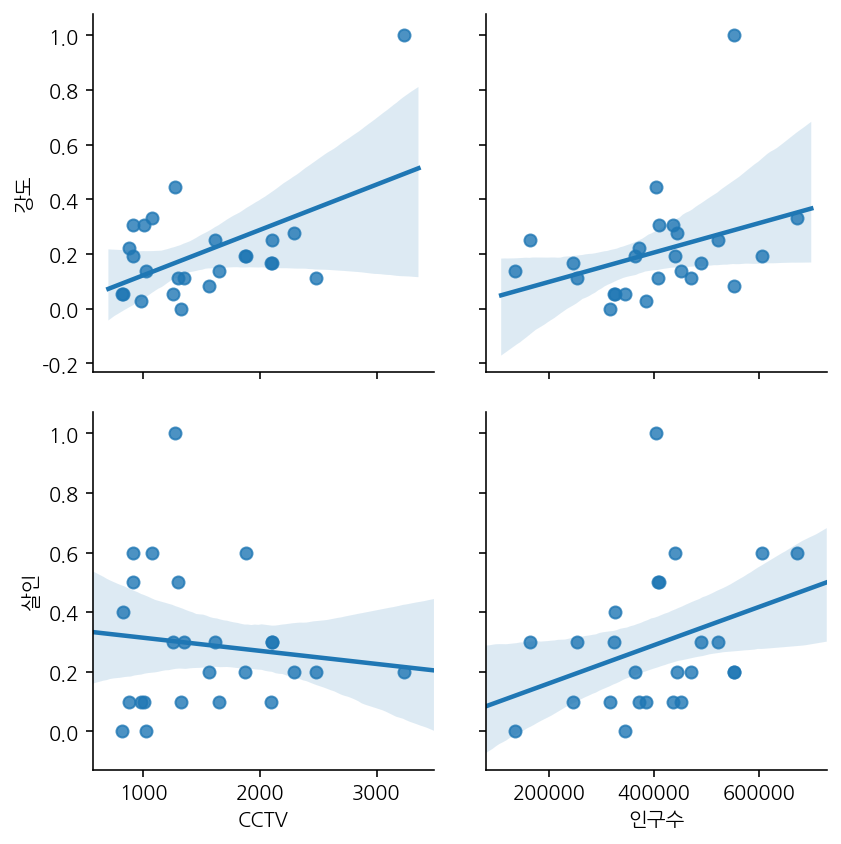

In [154]:
#관계가 있는 지 없는지 확인할 수 있다. 
sns.pairplot(crime_anal_normal,
            x_vars =['CCTV','인구수'],
            y_vars =['강도','살인'],
            kind='reg',size =3)
plt.show()

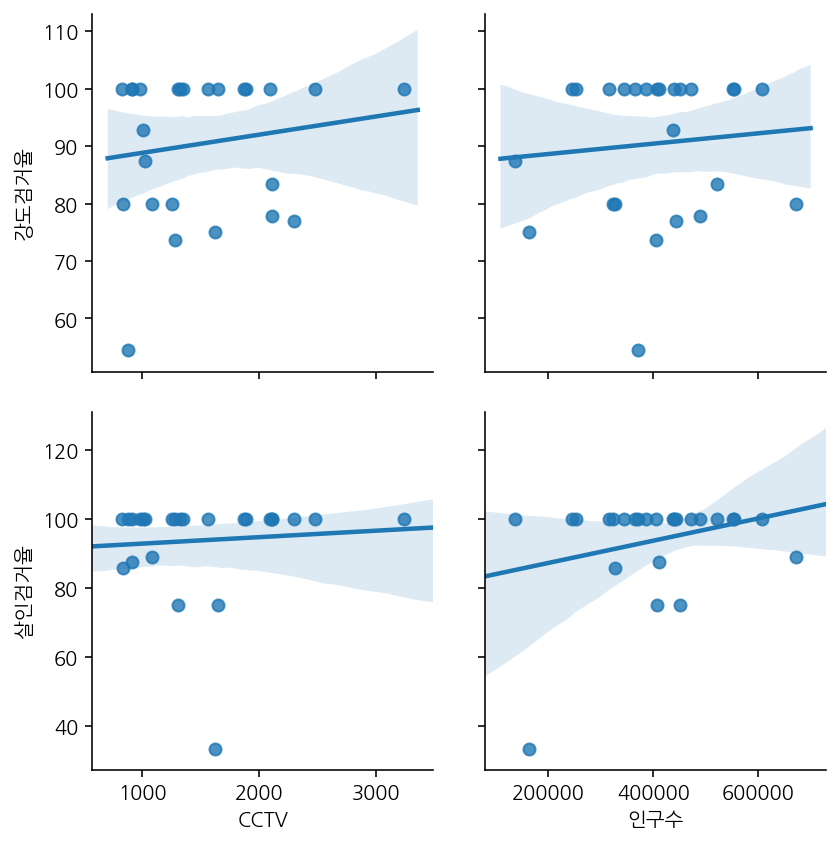

In [155]:
#관계가 있는 지 없는지 확인할 수 있다. 
sns.pairplot(crime_anal_normal,
            x_vars =['CCTV','인구수'],
            y_vars =['강도검거율','살인검거율'],
            kind='reg',size =3)
plt.show()

In [158]:
tmp_max = crime_anal_normal['검거율'].max()
crime_anal_normal['검거율'] = crime_anal_normal['검거율']/tmp_max * 100

In [159]:
crime_anal_normal_sort = crime_anal_normal.sort_values(by='검거율', ascending = False)
crime_anal_normal_sort

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
도봉구,0.046117,0.055556,0.0,0.000000,0.000000,90.839695,56.812933,100.000000,100.000000,98.373984,825,344096,0.101672,100.000000
성동구,0.000000,0.000000,0.1,0.158030,0.069504,86.967264,69.135802,100.000000,100.000000,75.000000,1327,316068,0.327534,96.654113
동대문구,0.208738,0.194444,0.2,0.394708,0.468957,89.969720,55.206186,100.000000,100.000000,83.157895,1870,364527,1.466848,96.033239
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,2.297014,95.984559
중랑구,0.145631,0.305556,0.5,0.303197,0.672784,85.714286,62.211709,87.500000,100.000000,91.463415,916,410296,1.927168,95.709404
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,1.293053,95.572437
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,1.023346,94.656164
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,4.200000,94.532602
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,1.200791,92.724761


<function matplotlib.pyplot.show(*args, **kw)>

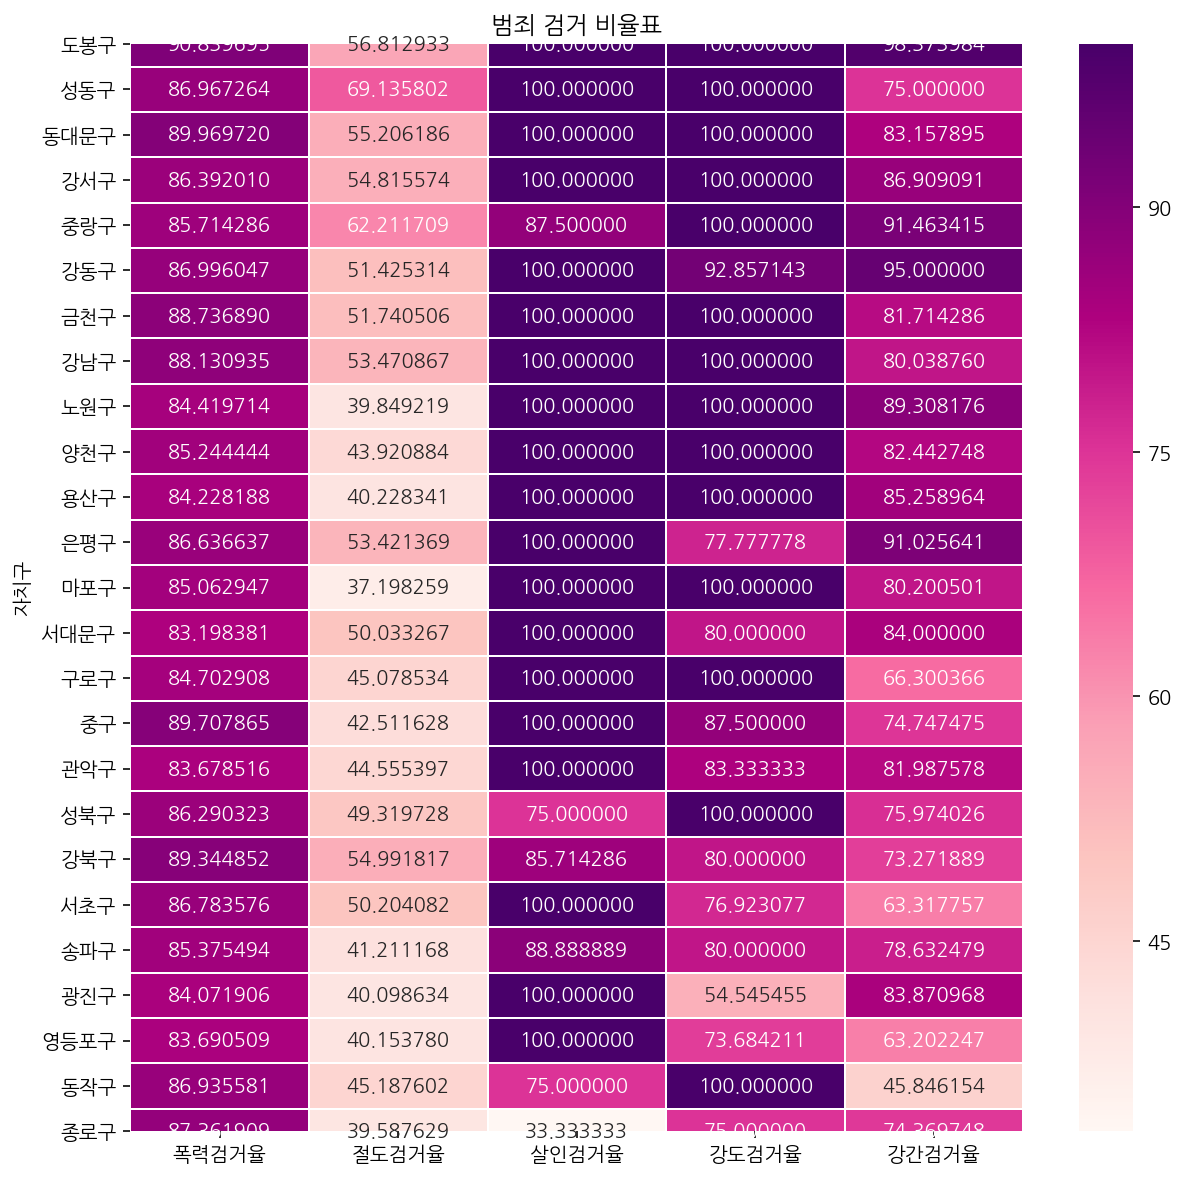

In [162]:
## 히트맵! 
## 찐한곳이 수사 활동을 잘 하는 곳일것이다 
plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_normal_sort[target_col],
           annot=True, fmt = 'f',linewidths= 0.5, cmap = 'RdPu')
plt.title('범죄 검거 비율표')
plt.show

In [165]:
col 

['강간', '강도', '살인', '절도', '폭력']

In [168]:
crime_anal_normal['범죄'] = crime_anal_normal['범죄']/5
crime_anal_normal_sort = crime_anal_normal.sort_values(by='범죄',ascending= False)
crime_anal_normal_sort

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,0.168000,94.532602
영등포구,0.611650,0.444444,1.0,0.542080,0.840297,83.690509,40.153780,100.000000,73.684211,63.202247,1277,404501,0.137539,80.876508
송파구,0.315534,0.333333,0.6,0.616318,0.721593,85.375494,41.211168,88.888889,80.000000,78.632479,1081,673161,0.103471,83.875720
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,0.091881,95.984559
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366,1884,440305,0.090444,88.802282
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,0.089370,88.235727
서초구,0.786408,0.277778,0.2,0.492098,0.350254,86.783576,50.204082,100.000000,76.923077,63.317757,2297,443989,0.084262,84.575333
마포구,0.716019,0.027778,0.1,0.610437,0.584928,85.062947,37.198259,100.000000,100.000000,80.200501,980,385507,0.081566,90.232667
중랑구,0.145631,0.305556,0.5,0.303197,0.672784,85.714286,62.211709,87.500000,100.000000,91.463415,916,410296,0.077087,95.709404


<function matplotlib.pyplot.show(*args, **kw)>

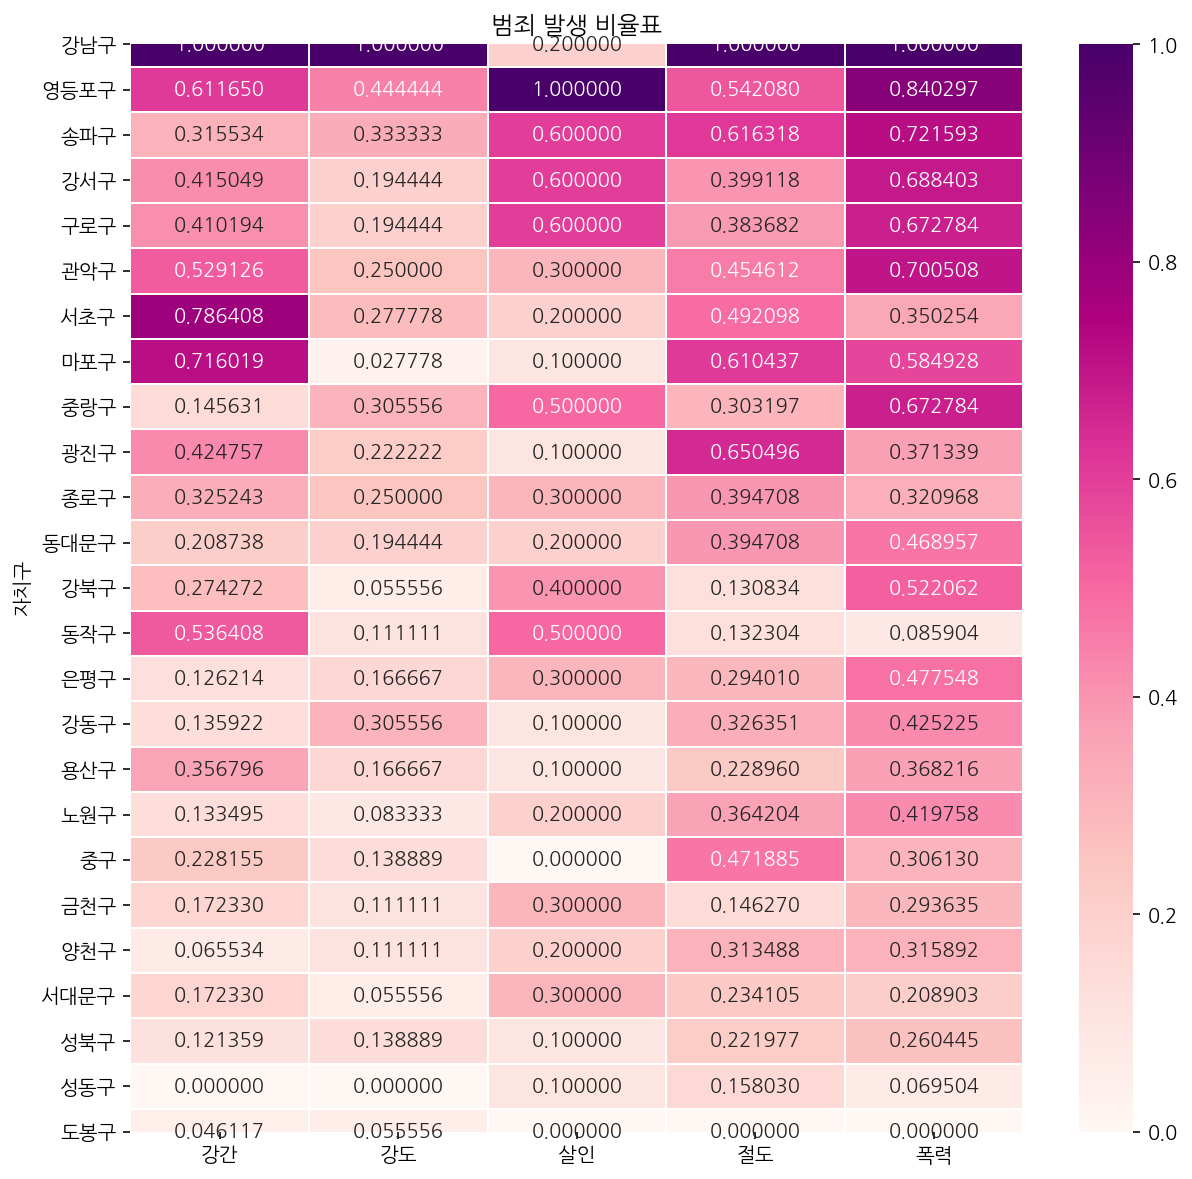

In [169]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_normal_sort[col],annot= True,
           fmt='f',linewidth=0.5,cmap='RdPu')
plt.title('범죄 발생 비율표')
plt.show

In [170]:
crime_anal_normal.to_csv('./data/crime_mid.csv',sep =',',encoding='utf-8')    

# 시군구 

In [174]:
import json
geo_json = './data/seoul_gu.json'
geo_seoul_gu = json.load(open(geo_json, encoding = 'utf-8'))
print(geo_seoul_gu['type'])
geo_seoul_gu['features'][0]

FeatureCollection


{'type': 'Feature',
 'id': '강동구',
 'properties': {'code': '11250',
  'name': '강동구',
  'name_eng': 'Gangdong-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.11519584981606, 37.557533180704915],
    [127.16683184366129, 37.57672487388627],
    [127.18408792330152, 37.55814280369575],
    [127.16530984307447, 37.54221851258693],
    [127.14672806823502, 37.51415680680291],
    [127.12123165719615, 37.52528270089],
    [127.1116764203608, 37.540669955324965],
    [127.11519584981606, 37.557533180704915]]]}}

In [176]:
crime_anal_normal = pd.read_csv('./data/crime_mid.csv',encoding='utf-8')   
crime_anal_normal.set_index('자치구',inplace=True)
crime_anal_normal

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,0.168000,94.532602
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,0.051722,95.572437
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,0.055309,85.941698
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,0.091881,95.984559
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,0.089370,88.235727
광진구,0.424757,0.222222,0.1,0.650496,0.371339,84.071906,40.098634,100.000000,54.545455,83.870968,878,370519,0.070753,81.292675
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366,1884,440305,0.090444,88.802282
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,0.040934,94.656164
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,0.048032,92.724761


In [178]:
map = folium.Map(location = [37.5442692, 126.9665101],zoom_start = 10)
map.choropleth(geo_data = geo_seoul_gu , 
               data = crime_anal_normal['범죄'],
               columns= [crime_anal_normal.index,
                         crime_anal_normal['범죄']],
              key_on='feature.id',
              fill_color = 'YlGn',
              legend_name = '자치구별 범죄 발생 비율')
map

In [185]:
tmp_pop_crime_rate = crime_anal_normal['범죄'] / crime_anal_normal['인구수'] * 1000000
map = folium.Map(location = [37.5442692, 126.9665101],zoom_start = 10)
map.choropleth(geo_data = geo_seoul_gu , 
               data = tmp_pop_crime_rate,
               columns= [crime_anal_normal.index,
                         tmp_pop_crime_rate],
              key_on='feature.id',
              fill_color = 'PuRd',
              legend_name = '인구대비 범죄율(백만명 기준)')
map

# 관할서별 검거현황

In [186]:
crime_per_police_raw

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
0,강남,339,24,3,2438,2336,269,26,3,1129,2096,강남구
1,강동,160,14,4,1754,2530,152,13,5,902,2201,강동구
2,강북,217,5,7,1222,2778,159,4,6,672,2482,강북구
3,강서,275,10,9,1952,3204,239,10,10,1070,2768,강서구
4,관악,322,12,6,2103,3235,264,10,7,937,2707,관악구
5,광진,279,11,4,2636,2392,234,6,4,1057,2011,광진구
6,구로,273,10,9,1910,3164,181,13,9,861,2680,구로구
7,금천,175,7,6,1264,2193,143,7,6,654,1946,금천구
8,남대문,57,5,1,946,890,52,4,1,429,832,중구
9,노원,159,6,5,1857,2516,142,9,6,740,2124,노원구


In [187]:
crime_per_police_raw['lats'] = lats
crime_per_police_raw['lons'] = lons
crime_per_police_raw

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구,lats,lons
0,강남,339,24,3,2438,2336,269,26,3,1129,2096,강남구,37.5093899463715,127.067070541137
1,강동,160,14,4,1754,2530,152,13,5,902,2201,강동구,37.5286763457485,127.126894359114
2,강북,217,5,7,1222,2778,159,4,6,672,2482,강북구,37.637408362838,127.027340967017
3,강서,275,10,9,1952,3204,239,10,10,1070,2768,강서구,37.5513470867979,126.849886071842
4,관악,322,12,6,2103,3235,264,10,7,937,2707,관악구,37.4745875338795,126.951062346192
5,광진,279,11,4,2636,2392,234,6,4,1057,2011,광진구,37.54292164557882,127.08396170505674
6,구로,273,10,9,1910,3164,181,13,9,861,2680,구로구,37.4948844667899,126.886660285169
7,금천,175,7,6,1264,2193,143,7,6,654,1946,금천구,37.45725314643252,126.89674921449215
8,남대문,57,5,1,946,890,52,4,1,429,832,중구,37.55478043476484,126.97349729923079
9,노원,159,6,5,1857,2516,142,9,6,740,2124,노원구,37.6423345266253,127.071404832413


In [189]:
col = ['강간 검거','강도 검거','살인 검거','절도 검거','폭력 검거']
tmp = crime_per_police_raw[col] / crime_per_police_raw[col].max()
crime_per_police_raw['검거'] = np.sum(tmp, axis =1)
crime_per_police_raw.head()


,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구,lats,lons,검거
0,강남,339,24,3,2438,2336,269,26,3,1129,2096,강남구,37.5093899463715,127.067070541137,3.768434
1,강동,160,14,4,1754,2530,152,13,5,902,2201,강동구,37.5286763457485,127.126894359114,2.890511
2,강북,217,5,7,1222,2778,159,4,6,672,2482,강북구,37.637408362838,127.027340967017,2.532884
3,강서,275,10,9,1952,3204,239,10,10,1070,2768,강서구,37.5513470867979,126.849886071842,3.768981
4,관악,322,12,6,2103,3235,264,10,7,937,2707,관악구,37.4745875338795,126.951062346192,3.478248


In [192]:
#각 경찰서 위치 게릿
map = folium.Map(location = [37.5442692, 126.9665101],zoom_start = 11)
for idx in crime_per_police_raw.index : 
    folium.Marker([float(crime_per_police_raw['lats'][idx]),
                   float(crime_per_police_raw['lons'][idx])],
                 popup ='서울 %s 경찰서'%crime_per_police_raw['죄종'][idx]).add_to(map)
map

In [193]:
#각 경찰서 위치 게릿
map = folium.Map(location = [37.5442692, 126.9665101],zoom_start = 11)
for idx in crime_per_police_raw.index : 
    gps = [ float(crime_per_police_raw['lats'][idx]),float(crime_per_police_raw['lons'][idx])]
    folium.Marker(gps,popup ='서울 %s 경찰서'%crime_per_police_raw['죄종'][idx]).add_to(map)
    
    folium.CircleMarker(gps,radius=crime_per_police_raw['검거'][idx] * 10,
                       color= '#547544',fill_color = '#333333').add_to(map)
map